# Advanced Machine Learning - programming assignment 1

*This assignment will not be graded, but we suggest you finish it before Monday November 24th*

**Please fill in:**
* Felix Ceard-Falkenberg (7174020)
* name 2 (student id 2)

### Further instructions for assignments:
* Code quality is considered during the assessment (of ass 2 & 4). Make sure your code is properly commented. 
* Submit your code in BrightSpace only for ass 2 & 4.
* When you submit the code, make sure to name the submitted file according to your and your collaborators last name (i.e. submitter_collaborator.ipynb). 
* **Failure to follow these instructions can affect the assignment grade.**

## Multi-armed Bandits

In this programming assignment, we will look at how we can solve a k-armed bandit problem as discussed in the lecture. Expect for winning at the slot machines, you are expect to better understand the tradeoff between exploration and exploiation. 

Here are the objectives of this assignment:
1.   Get familier with the Open-AI gymnasium environment,
2.   Implement your own k-armed bandit environment based on the gym framework,
3.   Use an epsilon-greedy algorithm to find the optimal action for this k-armed bandit problem,
4.   Play with the parameter epsilon and identify a reasonable setting for balancing exploration and exploiation. 
    

### 0. Please check the given 'README' file

### 1. Let's start with the OpenAI gym

Gymnasium (https://gymnasium.farama.org/) is a wide-used toolkit for developing and comparing reinforcement learning algorithms. 

1. Gymnasium makes no assumptions about the structure of your agent, and is compatible with any numerical computation library, such as TensorFlow or Theano. 

2. The library is a collection of test problems — **environments** — that you can use to work out your reinforcement learning algorithms. These environments have a shared interface, allowing you to write general algorithms.

**Great!** Now let's import the gymnasium class and work on a basic example of gym code.


In [1]:
import gymnasium

Like mentioned above, gymnasium's main purpose is to provide a large collection of **environments** that expose a common interface. You can find a listing of those environments below (they are Markov decision process(MDP) environments and we discussed MDP in our lecture 2), as follows:

In [2]:
from gymnasium import envs
print(envs.registry)

{'CartPole-v0': EnvSpec(id='CartPole-v0', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=195.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, disable_env_checker=False, kwargs={}, namespace=None, name='CartPole', version=0, additional_wrappers=(), vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv'), 'CartPole-v1': EnvSpec(id='CartPole-v1', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, disable_env_checker=False, kwargs={}, namespace=None, name='CartPole', version=1, additional_wrappers=(), vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv'), 'MountainCar-v0': EnvSpec(id='MountainCar-v0', entry_point='gymnasium.envs.classic_control.mountain_car:MountainCarEnv', reward_threshold=-110.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, disable_env_ch

We are now going to explain how the RL framework of gym works. 
- An **ENVIRONMENT**, 
- You also have an **AGENT**,
- The agent takes an **ACTION**, in our case, 10 actions are possible to take,
- When a single **ACTION** is chosen and fed to our **ENVIRONMENT**, the **ENVIRONMENT** measures how good the action was taken and produces a **REWARD**, which is usually a numeric value.

In MDP problems, the **ENVIRONMENT** will also provides an **OBSERVATION**, which represets the state of the **ENVIRONMENT** at the current moment. In the multi-armed bandit problems, there is no **OBSERVATION** (or state) or one constant state. 

Please read the 'Basic usage' https://gymnasium.farama.org/introduction/basic_usage/ for better understanding the framework. 


### 2. Implement your own environment

Next, we are going to implement our own environment following the framework of gymnasium. This enviroment is a gambiling room with ten different slot machines (a 10-armed bandit problem). Similar with examples given in the lecture, the reward of each slot machine follows a normal distribution, but the average reward (mean) and variance of each action are different. Your goal is to determine the optimal action from all possible actions/machines. 

The core gym interface is **Env**, which is the unified environment interface. There is no interface for agents. The following are the Env methods you should know:

- `step(self, action)`: Steps the environment by one timestep. Returns observation, reward, done, info.
- `reset(self)`: Resets the environment to an initial state. Returns an initial observation. Each call of `reset()` should yield an environment suitable for a new episode, independent of previous episodes. Because there is no state transition in multi-armed bandit problems, this function is not used here.
- `render(self, mode='human')`: Renders one frame of the environment. The default mode will do something human friendly, such as pop up a window. In this assignment, there is no need to create a pop up window. 

Before writing your own codes, read through the readme of github page of gymasium (https://github.com/Farama-Foundation/Gymnasium). You are also recommended to read at least the codes for one simple environment and one example agent.

#### 2.1 Self-defined Slot Machine

**Please fill in the missing codes in the function sample.**

In [3]:
import numpy as np

class slotMachine:
    """
        A slot machine contains a reward distribution that randomly generated with restricted mean and standard deviation. 
            sample function: generates a reward at each time step based on the given reward distribition
    """
    def __init__(self):
        self.mu = np.random.uniform(-5, 5)  # mean
        self.sigma = np.random.uniform(0.5, 1)  # standard deviation

    def sample(self):
        ########## TODO: to be filled. ########## 
        
        # sample a value from a normal distribution with mean mu and standard deviation sigma
        return np.random.normal(self.mu, self.sigma)

#### 2.2 Game Environment
**Please fill in the missing codes in function step in the environment.** 

In [4]:
from gymnasium import spaces

# The environment has to inherit the interface of gymnasium.Env
class GamblingRoom(gymnasium.Env):
    """
    A k-armed bandit environment: a gambling room with slot machines, allows the agents to interact with it.
        r_machines: A list of slot machines, each gamblingRoom contains k number of slotMachines
    """
    def __init__(self, k, seed=None):
        # set random seed
        self.seed(seed)     
        # initialize reward distribution for each action/machine
        self.r_machines = []
        for i in range(k):
            # each gamblingRoom contains k number of slotMachines
            self.r_machines.append(slotMachine())

        self.num_arms = k
        self.action_space = spaces.Discrete(self.num_arms)
        self.observation_space = spaces.Discrete(1)
        # for our bandit environment, the state is constant
        self.state = 0
    
    # step up the environment based on the selected action,
    # return the constant state, reward, done = false, and info 
    # for now, we do not have to worry about the DONE and INFO variables.
    def step(self, action):
        assert self.action_space.contains(action)
        done = False

        ########## TODO: to be filled. ##########   
        # assert type(action) == int

        # update the state 
        reward = self.r_machines[action].sample()
        
        
        return self.state, reward, done, {}

    # random seed used for reproducibility purposes
    def seed(self, seed):
        if seed is not None:
            np.random.seed(seed)
    
    def reset(self):
        pass

    def render(self, mode='human', close=False):
        pass

    def close(self):
        pass

### 3. Implement an agent with the epsilon greedy algorithm

In this part, you are expected to implement an RL agent. To decide the action to take at each time step, this agent uses the epsilon greedy algorithm introduced in the lecture.

**Please fill in the missing codes in function select_action and update_parameters in the agent.** Feel free to import the needed packages if there are any.

In [7]:
class EplisonGreedyAgent:
    def __init__(self, k, e):
        # set up the number of arms/actions
        self.num_arms = k
        # set up the value of epsilon
        self.epsilon = e
        # init the estimated values of all actions
        self.Qvalues = np.zeros(k)
        # init the numbers of time step that every action is selected
        self.stepSize = np.zeros(k)

    ##
    # select the action to take at the current time step
    # (for MDP, choose the action based on state; for k-armed bandit, no state given)
    # return: the action to take
    ##
    def select_action(self):
        ########## TODO: to be filled. ##########   

        select_greedy = np.random.rand() > self.epsilon  # same as 1 - epsilon

        if select_greedy:
            return np.argmax(self.Qvalues)
       
        # select a random action
        return np.random.randint(0, self.num_arms)
        

    ##
    # Update the Q-values of the agent based on received rewards
    # input: action_index = the action, reward = the reward from this action
    # return: null
    ##
    def update_parameters(self, action, reward):
        ########## TODO: to be filled. ##########  

        # print(action)
        # assert type(action) == int

        # 1. increase the step size
        self.stepSize[action] += 1.0

        # 2. update Q-value
        new_value = self.Qvalues[action] + (1.0 / self.stepSize[action]) * (reward - self.Qvalues[action])
        self.Qvalues[action] = new_value
    
        

### 4. Run the simulation, play with parameters and analyse results

Finally, we write codes for running the simulation. 

In order to decrease the effect of randomness, we usually conduct multiple simulation runs and average the results. In the implementation, you may start with one run, then use the variable `num_runs` for running multiple simulations.

In each run, you shall setup the `epsilon` and number of time step `num_episodes` (0.01 and 500 by default). Then, after the initlization of our agent and environment, **please fill in the missing codes (with ??? or TODO: to be filled). **

In [53]:
num_action = 10
num_seed = 5
num_runs = 50  # number of simulation runs
num_episodes = 500  # number of steps in each run
# num_episodes = 5  # number of steps in each run
epsilon = 0.1

def simulate(num_action, seed, num_runs) -> [[float]]:
    # init the environment and set up the random seed
    env: GamblingRoom = GamblingRoom(k = num_action, seed=seed)


    # delete the wrap
    env = env.unwrapped
    
    all_rewards = []

    # run multiple simulations
    for i_run in range(num_runs):
        rewards = []
        average_reward = None
        ########## TODO: to be filled. ########## 
        
        # init the epsilon-greedy RL agent 
        agent = EplisonGreedyAgent(k = num_action, e=epsilon)
        # in each simulation run, loop the action selection
        # save the result variables you need

        for step in range(num_episodes):
            
            # 1. Select action
            action = agent.select_action()
            # print(action)

            # 2. Update environment
            state, reward, done, _ = env.step(action)
            # print(state, reward, done)

            # 3. Update agent with the reward
            agent.update_parameters(action=action, reward=reward)

            if average_reward is None:
                average_reward = reward
            else:
                average_reward = (step/(step+1.0)) * average_reward + (1.0 / (step + 1.0)) * reward

            rewards.append(average_reward)
    
        all_rewards.append(rewards)
    env.close()

    return np.array(all_rewards)

(1000, 500)

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
def plot_results(all_rewards, title: str = ''):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    mean = np.mean(all_rewards, axis=0)
    std = np.std(all_rewards, axis=0)

    # plot in gray in the background the individual runs
    for rid in range(all_rewards.shape[0]):
        ax.plot(all_rewards[rid], c='gray', alpha=0.1)


    ax.plot(mean, label="mean")
    ax.plot(mean+std, label="+sigma")
    ax.plot(mean-std, label="-sigma")


    plt.grid(True)
    plt.legend()
    plt.suptitle(title)
    plt.show()

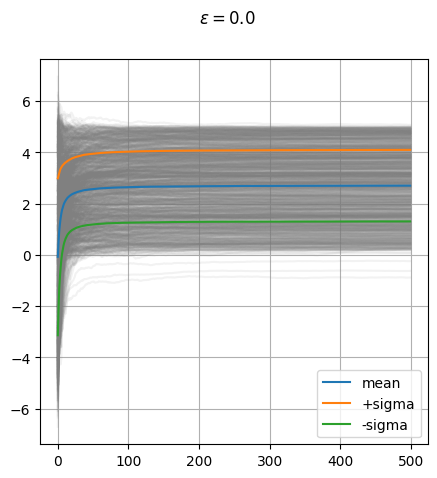

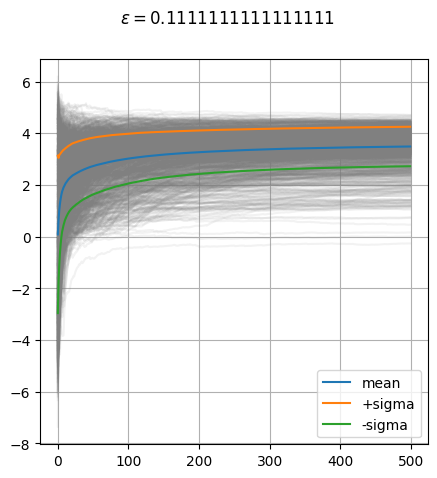

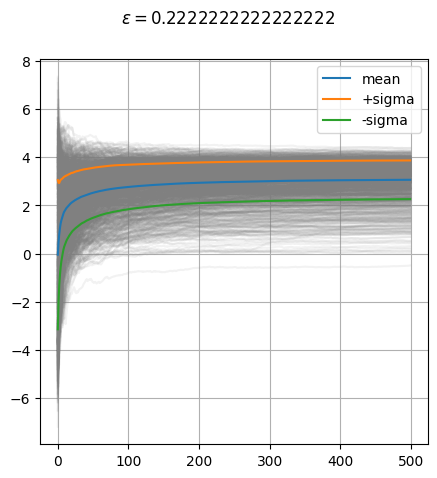

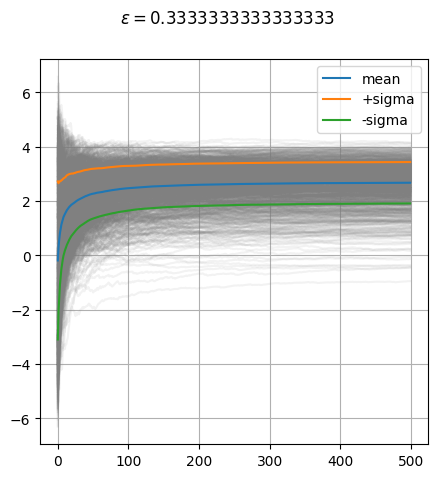

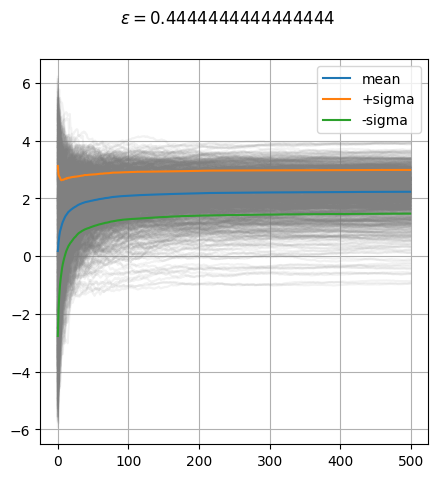

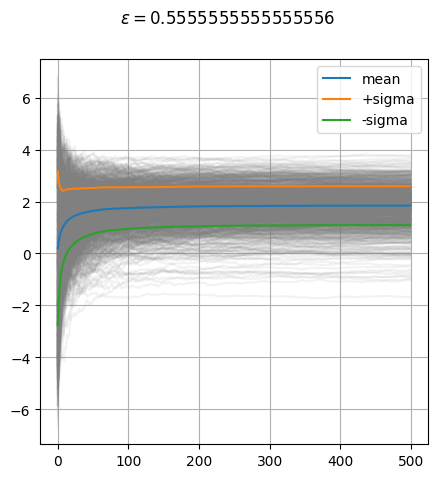

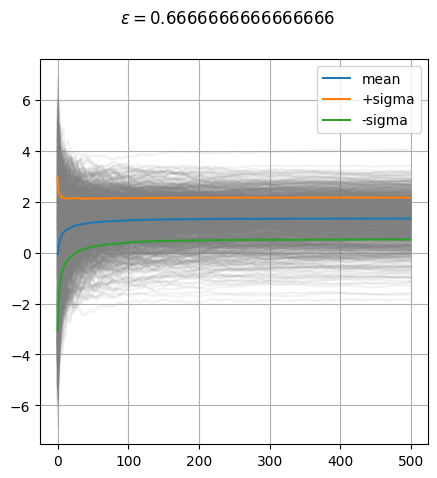

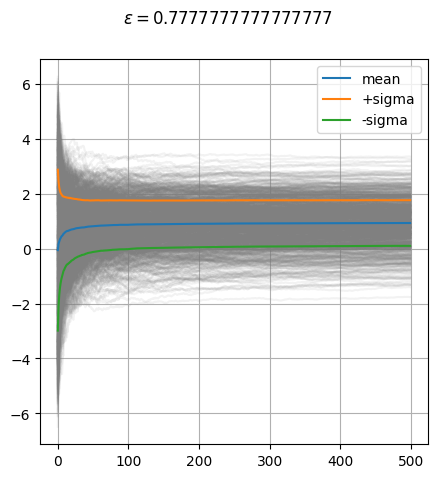

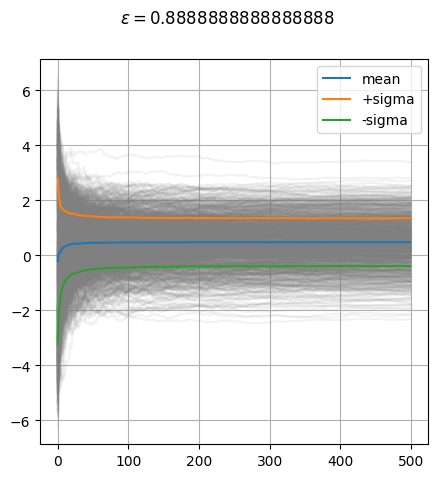

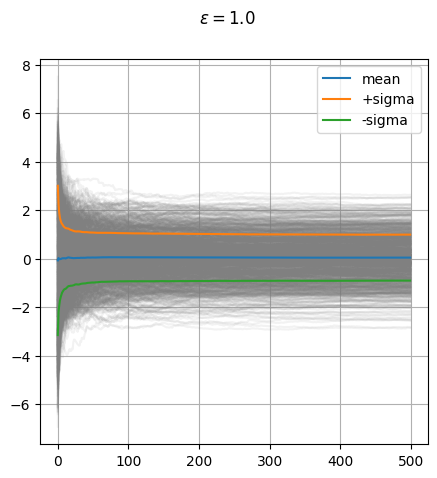

In [64]:
for epsilon in np.linspace(0.0, 1.0, 10):
    num_seed = 1000

    seeds = np.random.randint(0, 100000, num_seed)
    all_rewards = []
    for sid in range(num_seed):

        seed = seeds[sid]


        rewards = simulate(num_action=num_action, seed=seed, num_runs=1)
        all_rewards.append(rewards)

    all_rewards = np.concat(all_rewards, 0)

    all_rewards.shape
    plot_results(all_rewards, f'$\\epsilon = {epsilon}$')

Now it's time to examine the performance of algorithms with different epsilon values (different exploration strategies) in multiple simulation runs. 

You can play with the parameter epsilon under 2 or 3 different gambling environments (by initlizing different reward distributions for machines). **For each environment, you can try different values (e.g. at least 2) of epsilon and identify a reasonable epsilon value that could balance the exploration and exploiation**. It is good to think about how you identify the good epsilon value in this environment and why it is a good one. 

Few instructions:
- Try to generate two plots presenting compariable measures of the different epsilon settings (e.g. the average reward per step and % of optimal action). 
- You shall present the average results from at least 100 simulation runs. Remember that the gambling environment CANNOT be changed over those runs used for calculating the average results. 
- You may adjust the total time steps when the learning needs more time for a certain epsilon value, but do not over spend your time on this.    

You are almost done (and well done)! You do not need to submit this assignment for grading, but it is good to check the solution file. You can ask our TAs during the tutorial sessions if you have any questions. 